##


In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston)



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target

print(dataset)


         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   

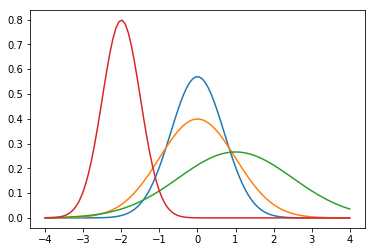

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

x = np.linspace(-4, 4, 100)
for mean, variance in [(0, 0.7), (0,1), (1, 1.5), (-2, 0.5)]:
    plt.plot(x, mlab.normpdf(x, mean, variance))
    
plt.show()

## The below scatter plot can help us visually see that there is some correlation between the two variables RM and price.

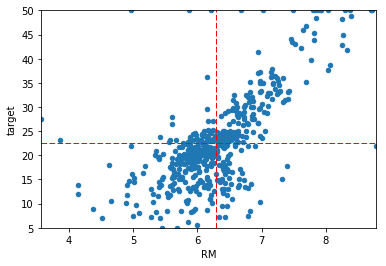

In [10]:
x_range = [dataset['RM'].min(),dataset['RM'].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target', xlim=x_range, ylim = y_range)
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),dataset['target'].mean()], '--' , color='red', linewidth=1)
meanX = scatter_plot.plot([dataset['RM'].mean(), dataset['RM'].mean()], y_range, '--', color='red', linewidth=1)

## Linear regression model from statsmodel
Two different ways to use
* statsmodels.api
* statsmodels.formula.api

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

y = dataset['target']
X = dataset['RM']
X = sm.add_constant(X)

# the X variable nneds to be extended by  a constant value, the bias is calculated accordingly.
# Now X contains both the predictive variable and a unit constant, 
# also beta is no longer a single coefficient and is a vector of coefficient

X.head()


,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [11]:
# initializtion OLS here means Ordinary least squares method of regression.
linear_regression = sm.OLS(y, X)
# ask for estimation of regressino co-efficient
fitted_model = linear_regression.fit()

# same as above using formual api
# linear_regression = smf.ols(formula='target ~ RM', data=dataset)
# fitted_model = linear_regression.fit()
fitted_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           2.49e-74
Time:                        17:45:02   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
print (fitted_model.params)
betas = np.array(fitted_model.params)
fitted_values = fitted_model.predict(X)

const   -34.670621
RM        9.102109
dtype: float64


## Plot the regression line on the previous scatter plot


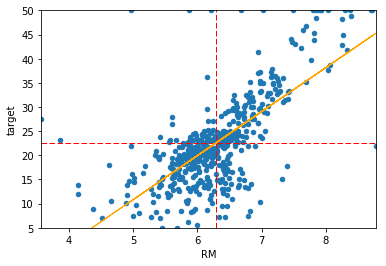

In [13]:
import pandas as pd

dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target

x_range = [dataset['RM'].min(),dataset['RM'].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target', xlim=x_range, ylim=y_range)
meanY = scatter_plot.plot(x_range,[dataset['target'].mean(),dataset['target'].mean()], '--',color='red', linewidth=1)
meanX =scatter_plot.plot([dataset['RM'].mean(),dataset['RM'].mean()], y_range, '--', color='red', linewidth=1)
regression_line = scatter_plot.plot(dataset['RM'], fitted_values,'-', color='orange', linewidth=1)

## Using SciKit Learns liner model
We can use the linear_model module for linear regression.

A very convinient feature of scikit learn is the standard APIs, no matter what model we are working with.

In [ ]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)

observations = len(dataset)
X = dataset['RM'].values.reshape((observations,1))
# X should be always a matrix, never a vector
y = dataset['target'].values # y can be a vector

linear_regression.fit(X,y)

print (linear_regression.coef_)
print (linear_regression.intercept_)

print (linear_regression.predict(X)[:10])